In [294]:
import Pkg; Pkg.add("StatsBase")

   Updating registry at `~/.julia/registries/General`
######################################################################### 100.0%
  Resolving package versions...
  Installed Libiconv_jll ─ v1.16.0+8
  Installed StatsAPI ───── v1.0.0
  Installed StatsBase ──── v0.33.8
Updating `~/.julia/environments/v1.5/Project.toml`
  [2913bbd2] + StatsBase v0.33.8
Updating `~/.julia/environments/v1.5/Manifest.toml`
  [94ce4f54] ↑ Libiconv_jll v1.16.0+7 ⇒ v1.16.0+8
  [82ae8749] + StatsAPI v1.0.0
  [2913bbd2] ↑ StatsBase v0.33.5 ⇒ v0.33.8


In [358]:
n = 2
L = 8*n + 4
t = 1
Ne = Int(L / 2)
function Hamiltonian(L,t)
    H = zeros(2*L, 2*L)
    H[1,L] = -t
    H[L,1] = -t
    H[2L,L+1] = -t
    H[L+1,2L] = -t
    for i=1:2*L
      for j=1:2*L
        if i == j + 1 || i == j - 1
          H[i,j] = -t
        end 
      end
    end
    H[L,L+1]=0
    H[L+1,L]=0
    return H
end

H = Hamiltonian(L,t);

In [330]:
using StatsBase

function Lstate(L)                                 #generate a state of length L
    Lstated, Lstateu, Lstate = zeros(L), zeros(L), zeros(L)
    randomposu = sample(collect(1:L), Int(L/4), replace=false)
    randomposd = sample(collect(1:L), Int(L/4), replace=false)
    for j in randomposu
        Lstateu[j] = 1
    end
    for j in randomposd
        Lstated[j] = -1
    end
    for i=1:L 
        if Lstated[i] == -1 && Lstateu[i] == 1
            Lstate[i] = 2
        else
            Lstate[i] = Lstated[i] + Lstateu[i]
        end
    end
    return Lstate
end

Lstate (generic function with 1 method)

In [318]:
function extendedstate(Lstatevector)               #take a state of length L and make it 2*L
    L = length(Lstatevector)
    State2L = zeros(2*L)
    for j=1:L
        if Lstatevector[j] == -1
            State2L[j + L] = 1
        elseif Lstatevector[j] == 1
            State2L[j] = 1
        elseif Lstatevector[j] == 2
            State2L[j], State2L[j + L] = 1,1
        else
            State2L[j] = 0
        end
    end
    return State2L
end

extendedstate (generic function with 1 method)

In [319]:
function shortstate(ext_state)                    #pass trom 2*L state to L state
    L = Int(length(ext_state)/2)
    sh_state = zeros(L)
    for j=1:L
        if ext_state[j]==1
            sh_state[j]=1
        end
    end
    for j=1:L
        if ext_state[L+j]==1
            if sh_state[j]==1
                sh_state[j]=2
            else
                sh_state[j]=-1
            end
        end
    end
    return sh_state
end


shortstate (generic function with 1 method)

In [632]:
function Pauli(x,i,j)                 #check if state i and j are both occupied
    if x[i] == 1 && x[j] == 1
        return true
    end
    return false
end 

function occupied_states(v)         #generate a vector with positions of occupied states (from 2*L states)
    occ_states = []
    for i = 1:2*L
        if v[i] == 1
            append!(occ_states, i)
        end
    end
    return occ_states
end


function occupied_states_L(v)
    occ_states = []
    L =length(v)
    for i = 1 : L
        if abs(v[i]) == 1
            append!(occ_states, i )
            
        elseif v[i] == 2
            append!(occ_states, i )
        
        end
    end
    return occ_states
end


function move_L(w)
    
    v = copy(w)
    L = length(v)
    i = rand(occupied_states_L(v))
    j = rand(-1:2:1)

    j_pbc = mod(i+j,L)
    j_pbc == 0 ? j_pbc = L : j_pbc = j_pbc

        if v[i] != v[j_pbc] && v[j_pbc]!=2

            if abs(v[i])==1
            v[j_pbc] == 0 ? v[j_pbc] = v[i] : v[j_pbc] = 2
            v[i] = 0

            elseif v[i]==2    
            spin = rand(-1:2:1)

                if v[j_pbc] != spin
                v[i] = -spin

                    if abs(v[j_pbc]) == 1 
                        v[j_pbc] = 2 
                    elseif v[j_pbc] == 0 
                        v[j_pbc] = spin 
                    end

                end    
            end
            
        end

    return v
    
end


move_L (generic function with 1 method)

In [652]:
function move_com(v,i, j_pbc)
    
    if abs(v[i])==1
            v[j_pbc] == 0 ? v[j_pbc] = v[i] : v[j_pbc] = 2
            v[i] = 0

            elseif v[i]==2    
            spin = rand(-1:2:1)

                if v[j_pbc] != spin
                v[i] = -spin

                    if abs(v[j_pbc]) == 1 
                        v[j_pbc] = 2 
                    elseif v[j_pbc] == 0 
                        v[j_pbc] = spin 
                    end

                end    
            end

return v[i], v[j_pbc] 
    
end 
    
    
function move_L(w)
    
    v = copy(w)
    L = length(v)
    i = rand(occupied_states_L(v))
    j = rand(-1:2:1)

    j_pbc = mod(i+j,L)
    j_pbc == 0 ? j_pbc = L : j_pbc = j_pbc

        if v[i] != v[j_pbc] && v[j_pbc]!=2
            move_com(v,i, j_pbc)
        
        elseif v[i] == v[j_pbc] 
            i = rand(occupied_states_L(v))
            move_com(v,i, j_pbc)
        end

    return v
    
end


move_L (generic function with 1 method)

In [653]:
v=Lstate(12)
display(v),display(move_L(v))

12-element Array{Float64,1}:
  2.0
  0.0
  0.0
  0.0
  0.0
  0.0
 -1.0
  0.0
  1.0
  1.0
  0.0
 -1.0

12-element Array{Float64,1}:
  2.0
  0.0
  0.0
  0.0
  0.0
  0.0
 -1.0
  0.0
  1.0
  1.0
  0.0
 -1.0

(nothing, nothing)

In [654]:
using LinearAlgebra
U = eigvecs(H)  #unitary matrix
Udag = inv(U)   #U^-1
E = eigvals(H)  #eigenvalues of H

function U1(A, Ne) #take the first Ne columns
    U_1 = A[:,1:Ne]
    return U_1
end

U_1 = U1(U,Ne)

function U_tilde(A,v)                  #takes just the rows related to occupied states, Ne*Ne matrix
    U_tild = []
    U_tild = A[occupied_states(v),:]
    return U_tild
end

function ratio_det(v, z)
    rat= det(U_tilde(U_1,z))/det(U_tilde(U_1,v))
    return rat
end  


ratio_det (generic function with 1 method)

In [325]:
state = [1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1]      #initial state

state_1 = [1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1]    #|x'>


ratio_det (generic function with 1 method)

In [354]:
function n_i(vi)           #counts the number of els in positions vi, returning (# up , # down)
    
    n_up = 0
    n_down = 0
    
        if vi == 1
            n_up += 1
            
        elseif vi == -1
            n_down += 1
                
        elseif vi == 2
            n_down += 1
            n_up += 1
                
        end

return n_up, n_down

end


n_i (generic function with 1 method)

In [355]:
function Jastrow(state,g,v)
            
    D=length(state)       
    
    Spins=0
    Occupancies=0        
    n1 = n_i(state[D])[1] + n_i(state[D])[2]
    n2 = 0
    
    for i = 1 : D
                
        n_up= n_i(state[i])[1]    
        n_down = n_i(state[i])[2]
                
    Spins = Spins + n_up*n_down 
                
    n2= n_up + n_down
    n1n2 = n1*n2   
    n1 = n2
                
    Occupancies = Occupancies + n1n2
            
        end
    
    arg=  -g*Spins -v*Occupancies
            
return exp(arg)

end


Jastrow (generic function with 1 method)

In [356]:
#This function calculates the density observable in the odd sites A
function nA(v)
    nA = 0
    for j=1:length(v)
        if j%2 != 0
            nA += sum(n_i(v[j])) 
        end
    end
    return nA*2/length(v)
end

#This function calculates the density observable in the even sites B
function nB(v)
    nB = 0
    for j=1:length(v)
        if j%2 == 0
            nB += sum(n_i(v[j])) 
        end
    end
    return nB*2/length(v)
end

nB (generic function with 1 method)

In [628]:
import Random

function MC(q0, g, v, nsteps = 1000)
    Random.seed!(1234)
    state_L = q0
    sumA=0
    sumB=0
    accepted_moves = 0
    
    Suma_A = []
    Suma_B = []
    
    for istep = 1:nsteps
        state_2L = extendedstate(state_L)
        state_new_L = move_L(state_L)
        state_new_2L = extendedstate(state_new_L)
        acc =  (ratio_det(state_2L,state_new_2L) * (Jastrow(state_new_L,g,v)/Jastrow(state_L,g,v)))^2       #acceptance 
        
        acc = min(1,acc)
        
        if acc>rand()        #metropolis rule
            
            accepted_moves += 1
            
            n_newA= nA(state_new_L)
            sumA+=n_newA
            push!(Suma_A,sumA/accepted_moves)
            #push!(Suma_A,n_newA)
            
            n_newB= nB(state_new_L)
            sumB+=n_newB
            push!(Suma_B,sumB/accepted_moves)
            #push!(Suma_B,n_newB)
            
            state_L = copy(state_new_L)
            #compute observables
        end
    end
    return Suma_A,Suma_B, accepted_moves
end 

MC_prova= MC(Lstate(20),10,2,1000);


In [440]:
MC(Lstate(20), 10, 8, 1000)

(Any[0.5, 0.45, 0.4666666666666666, 0.475, 0.48, 0.5, 0.5, 0.4875, 0.48888888888888893, 0.49000000000000005  …  0.44642857142857134, 0.4456140350877192, 0.443103448275862, 0.4423728813559321, 0.44333333333333325, 0.44590163934426225, 0.4499999999999999, 0.4555555555555555, 0.4624999999999999, 0.47076923076923066], Any[0.5, 0.55, 0.5333333333333333, 0.525, 0.52, 0.5, 0.5, 0.5125, 0.5111111111111111, 0.51  …  0.5535714285714286, 0.5543859649122808, 0.556896551724138, 0.5576271186440679, 0.5566666666666668, 0.5540983606557378, 0.55, 0.5444444444444445, 0.5375000000000001, 0.5292307692307693], 65)

In [574]:
function Block(v, Ne)
    
    Average_Bin = []
    
    N=length(v)
    
    Lbin = Ne
    
    Nbin = N/Lbin
    
    a=0
    b=0
    
    for i in 1:Nbin
       
    a = (i-1)*Lbin +1
    b = i*Lbin
        
av_bin = (1/Int(abs(Lbin)))*(sum(v[Int64(a):Int64(b)]))
        
push!(Average_Bin,av_bin)
        
    end

return sum(Average_Bin)/Nbin

    
end

Block (generic function with 1 method)

In [578]:
v = Lstate(200)

Block(v, 20)



0.12999999999999998

In [585]:
import Random

function MC_Ne(q0, g, v, Ne, nsteps = 1000)
    
    Random.seed!(1234)
    state_L = q0
    sumA=0
    sumB=0
    accepted_moves = 0
    accepted_Ne = 0
    
    Suma_A = []
    Suma_B = []
    
    
    for istep = 1:nsteps
        state_2L = extendedstate(state_L)
        state_new_L = move_L(state_L)
        state_new_2L = extendedstate(state_new_L)
        acc =  (ratio_det(state_2L,state_new_2L) * (Jastrow(state_new_L,g,v)/Jastrow(state_L,g,v)))^2       #acceptance 
        
        acc = min(1,acc)
        
        if acc>rand()        #metropolis rule
            
            accepted_moves += 1 
            
            n_newA= nA(state_new_L)
            sumA+=n_newA
            push!(Suma_A,n_newA)
            
            n_newB= nB(state_new_L)
            sumB+=n_newB
            push!(Suma_B,n_newB)
            
            state_L = copy(state_new_L)
            #compute observables
        
            end
    
    end
    
    return Block(Suma_A, Ne), Block(Suma_B, Ne)

end 

MC_prova= MC_Ne(Lstate(20),10,8,Ne,10000)


(0.38125000000000003, 0.45208333333333334)

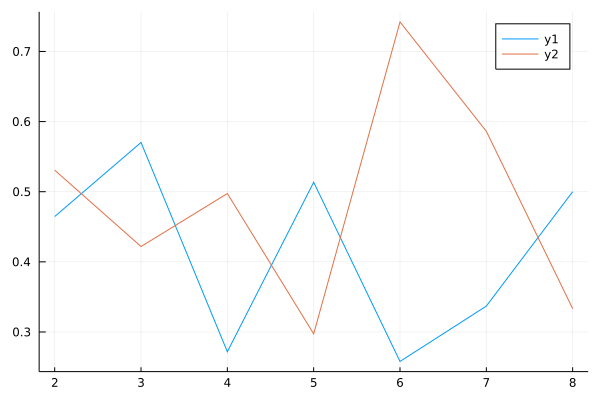

In [595]:
using Plots

yA = zeros(0)
yB = zeros(0)

for v=2:8
    MC_prova = MC_Ne(Lstate(20), 10, v, Ne, 10000)
    
    append!(yA, MC_prova[1])
    append!(yB, MC_prova[2])
end

plot(2:8,yA)
plot!(2:8,yB)


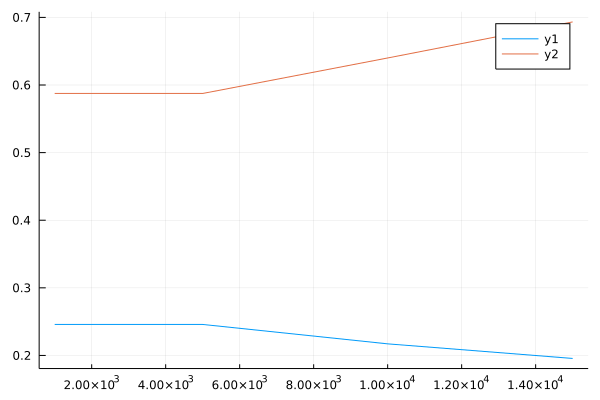

In [599]:
using Plots

v=4

yA = zeros(0)
yB = zeros(0)

n = [1000,2000,5000,10000,15000]

for nsteps in n
    
    MC_prova = MC_Ne(state_prova, 10, v, Ne, nsteps)
    
    append!(yA, MC_prova[1])
    append!(yB, MC_prova[2])
end

plot(n,yA)
plot!(n,yB)

In [589]:
v=2

MC_prova = MC_Ne(Lstate(20), 10, v, Ne,10000)

x=collect(1:MC_prova[3])

p= plot(x,MC_prova[1])
plot!(x,MC_prova[2])

LoadError: [91mBoundsError: attempt to access (0.5259319286871962, 0.4708265802269044)[39m
[91m  at index [3][39m

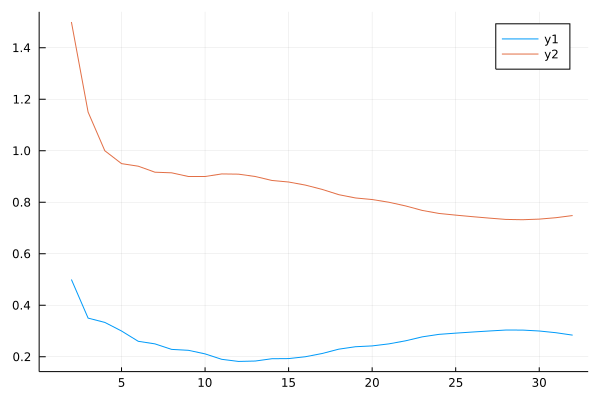

In [520]:
v=8

MC_prova_Ne = MC_Ne(Lstate(20), 10, v, 1000)

y=collect(1:MC_prova_Ne[3])

plot(y,MC_prova_Ne[1])
plot!(y,MC_prova_Ne[2])



In [519]:
using Plots
    
A = []
B = []

n = [1000,2000,5000,10000,15000]
v = collect(2:8)

    for v=2
        yA = zeros(0)
        yB = zeros(0)

        for nsteps in n
            MC_prova = MC(state_prova, 10, v, nsteps)
            append!(yA, MC_prova[1][MC_prova[3]])
            append!(yB, MC_prova[2][MC_prova[3]])
        end
    
    push!(A,yA)
    push!(B,yB)
    end

p = plot(n,zeros(0,length(n)))

    for i in length(v)
        plot!(n,A[i])
        plot!(n,B[i])
    end


LoadError: [91mExpects 5 elements in each col of y, found 0.[39m

In [463]:
zeros(0,length(n))

0×5 Array{Float64,2}

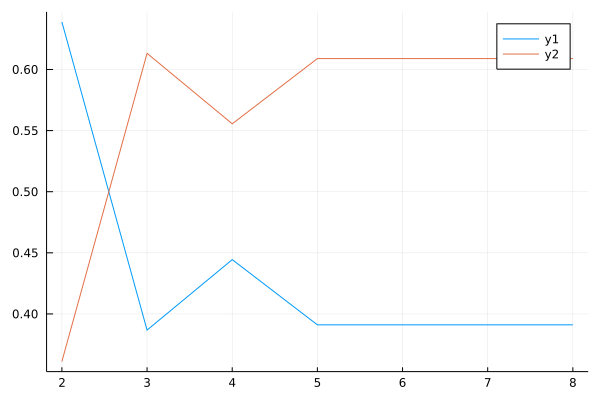

In [459]:
using Plots

yA = zeros(0)
yB = zeros(0)

for v=2:8
    MC_prova = MC(Lstate(20), 10, v, 1000)
    append!(yA, MC_prova[1][MC_prova[3]])
    append!(yB, MC_prova[2][MC_prova[3]])
end

plot(2:8,yA)
plot!(2:8,yB)

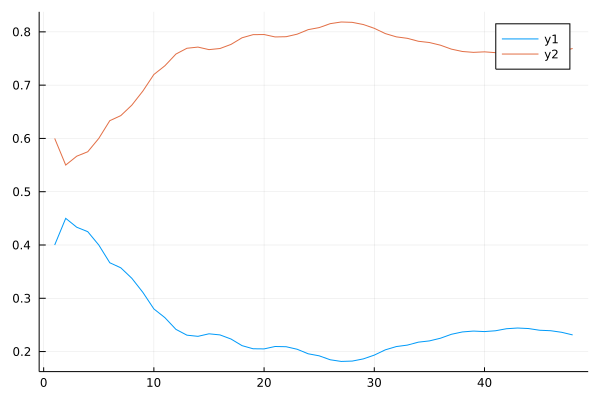

In [631]:
for v=8
    
MC_prova = MC(state_prova, 10, v, 10000)

x=collect(1:MC_prova[3])

e = plot(x,MC_prova[1])
    plot!(x,MC_prova[2])
    
return e
    
end



In [625]:
using Plots

v=2

yA = zeros(0)
yB = zeros(0)

n = [1000,2000,5000,10000,15000]

for nsteps in n
    
    MC_prova = MC(state_prova, 10, v, nsteps)
    
    append!(yA, MC_prova[1][MC_prova[3]])
    append!(yB, MC_prova[2][MC_prova[3]])
end

plot(n,yA)
plot!(n,yB)

LoadError: [91mBoundsError: attempt to access (Any[0.4, 0.5, 0.4, 0.4, 0.4, 0.3, 0.2, 0.2, 0.2, 0.3  …  0.3, 0.4, 0.3, 0.2, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0], 106)[39m
[91m  at index [3][39m

In [179]:
MC_res = []
for i = 1:8
    append!(MC_res, MC(state_prova,10,i,1000))
end
MC_res


LoadError: [91mDimensionMismatch("matrix is not square: dimensions are (11, 10)")[39m

In [370]:
function Hubbard(state,t,U,V)
            
    D=length(state)       
    
    Sum_V=0
    Sum_U=0    
    Sum_A=0
    Sum_B=0
    
    j_a = mod(i+j,L)
    j_a == 0 ? j_a = L : j_a = j_a
        
    n1 = n_i(state[D])[1] + n_i(state[D])[2]
    n2 = 0
    
    for i = 1 : D
                
        n_up= n_i(state[i])[1]    
        n_down = n_i(state[i])[2]
                
    Sum_U = Sum_U + n_up*n_down 
                
        n2= n_up + n_down
        n1n2 = n1*n2   
        n1 = n2
                
    Sum_V = Sum_V + n1n2
        
        if abs(state[i]) == 1
            
            ca= ca+c_i(vi,sign)
            
        end
    
    arg=  -g*Spins +U*Sum_U 
            
return exp(arg)

end

LoadError: [91msyntax: incomplete: "function" at In[370]:1 requires end[39m

In [410]:
function c_i(vi,orientation,sign) 

    (nu, nd) = n_i(vi)[1], n_i(vi)[2]
    
    print(nu, nd)
    
    orientation == 1  ? spin = nu :  spin = nd
    
        if spin != orientation && sign == 1
           eigenvalue = sqrt(spin+1) 
           vi = abs(vi+sign)

        elseif spin != orientation && sign == -1
            eigenvalue = sqrt(spin)  
            vi = vi+sign

        else 
            eigenvalue = 0

        end

return vi, eigenvalue
 
end


c_i (generic function with 2 methods)

In [411]:
c_i(-1,1,1)

01

(0, 1.0)

In [373]:
nu

1